In [2]:
import pandas as pd
base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
def converte_classe(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [5]:
base['income'] = base['income'].apply(converte_classe)

In [6]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
base['income'].unique()

array([0, 1], dtype=int64)

In [8]:
x = base.drop('income', axis=1)

In [9]:
x.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
y = base['income']

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [12]:
type(y)

pandas.core.series.Series

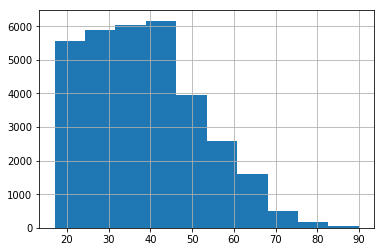

In [14]:
%matplotlib inline
base.age.hist()

In [16]:
import tensorflow as tf

In [17]:
idade = tf.feature_column.numeric_column('age')

In [18]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]

In [19]:
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [21]:
x.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [25]:
nome_colunas_categoricas = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']

In [23]:
x['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [27]:
x['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [28]:
x['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [29]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key=c, vocabulary_list=x[c].unique()) for c in nome_colunas_categoricas]

In [30]:
print(colunas_categoricas)

[VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sal

In [31]:
print(colunas_categoricas[0])

VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [32]:
print(colunas_categoricas[2])

VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [33]:
print(colunas_categoricas[3])

VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [34]:
nome_colunas_numericas = ['final-weight','education-num','capital-gain', 'capital-loos', 'hour-per-week']

In [35]:
colunas_numericas = [tf.feature_column.numeric_column(key=c) for c in nome_colunas_numericas]

In [36]:
print(colunas_numericas)

[NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital-gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital-loos', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='hour-per-week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [37]:
print(colunas_numericas[1])

NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [38]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [40]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.3)

In [41]:
x_treinamento.shape

(22792, 14)

In [42]:
x_teste.shape

(9769, 14)

In [43]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = x_treinamento, y = y_treinamento, batch_size=32
                                                        , num_epochs=None, shuffle=True)

In [ ]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

In [45]:
classificador.train(input_fn=funcao_treinamento, steps=10000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\mario\AppData\Local\Temp\tmp8h5xqjl8\model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 142.121
INFO:tensorflow:loss = 74997.33, step = 101 (0.706 sec)
INFO:tensorflow:global_step/sec: 425.153
INFO:tensorflow:loss = 4120.325, step = 201 (0.236 sec)
INFO:t

INFO:tensorflow:loss = 2073.248, step = 6001 (0.237 sec)
INFO:tensorflow:global_step/sec: 425.153
INFO:tensorflow:loss = 6069.0376, step = 6101 (0.235 sec)
INFO:tensorflow:global_step/sec: 406.142
INFO:tensorflow:loss = 709.1958, step = 6201 (0.244 sec)
INFO:tensorflow:global_step/sec: 419.794
INFO:tensorflow:loss = 4295.6, step = 6301 (0.239 sec)
INFO:tensorflow:global_step/sec: 430.651
INFO:tensorflow:loss = 8846.531, step = 6401 (0.232 sec)
INFO:tensorflow:global_step/sec: 436.292
INFO:tensorflow:loss = 1154.4534, step = 6501 (0.230 sec)
INFO:tensorflow:global_step/sec: 438.204
INFO:tensorflow:loss = 2693.3271, step = 6601 (0.227 sec)
INFO:tensorflow:global_step/sec: 440.139
INFO:tensorflow:loss = 274.47308, step = 6701 (0.226 sec)
INFO:tensorflow:global_step/sec: 412.856
INFO:tensorflow:loss = 1541.853, step = 6801 (0.244 sec)
INFO:tensorflow:global_step/sec: 444.047
INFO:tensorflow:loss = 1014.66705, step = 6901 (0.225 sec)
INFO:tensorflow:global_step/sec: 425.153
INFO:tensorflow:

In [46]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x=x_teste, batch_size=32, shuffle=False)

In [47]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [48]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\mario\AppData\Local\Temp\tmp8h5xqjl8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-79.96665], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1.0000000e+00, 1.8660545e-35], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-41.52508], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1.000000e+00, 9.244559e-19], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([32.462193], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([7.977171e-15, 1.000000e+00], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([40.909893], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([1.7102484e-18, 1.0000000e+00], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-21.8

In [50]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
    previsoes_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\mario\AppData\Local\Temp\tmp8h5xqjl8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [51]:
previsoes_final

[array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], 

In [52]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste, previsoes_final)
taxa_acerto

0.7832940935612652